In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = fetch_openml(data_id=40996,cache=True)

In [3]:
fashion_mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x = fashion_mnist['data']
y = fashion_mnist['target']

fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [5]:
x.shape

(70000, 784)

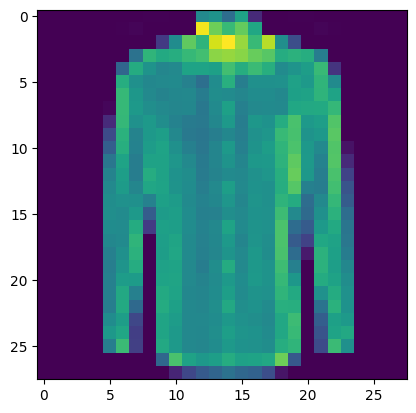

In [6]:
plt.imshow(x.iloc[3000,0:].values.reshape(28,28))

In [49]:
from sklearn.model_selection import train_test_split 

x_train ,x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [50]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
scores = []
for i in range(1,16):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(x_train,y_train)
     y_pred = knn.predict(x_test)
     scores.append(accuracy_score(y_test,y_pred))

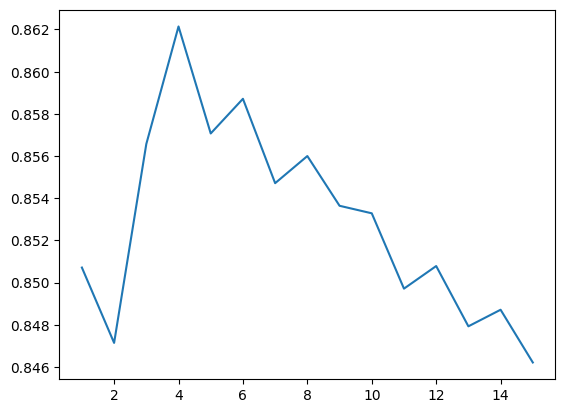

In [11]:
plt.plot(range(1,16),scores)

In [12]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8621428571428571

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=190)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca,y_train)
y_pred = knn.predict(x_test_pca)
accuracy_score(y_test,y_pred)



0.8662142857142857

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer
from tensorflow.keras.optimizers import Adam

In [16]:
input_shape = x_train.shape[1:]

In [20]:
model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
x_train

array([[-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275,
        -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275,
        -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275,
        -0.09123214, -0.03342068],
       ...,
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275,
        -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275,
        -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275,
        -0.09123214, -0.03342068]])

In [31]:
y_train = y_train.astype(np.int32)

In [32]:
y_train

47339    8
67456    0
12308    6
32557    3
664      2
        ..
37194    6
6265     8
54886    7
860      6
15795    6
Name: class, Length: 56000, dtype: int32

In [33]:
history = model.fit(x_train,y_train,batch_size=100,epochs=10,validation_split=0.1)


Epoch 1/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7724 - loss: 0.7045 - val_accuracy: 0.8386 - val_loss: 0.4548
Epoch 2/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8476 - loss: 0.4253 - val_accuracy: 0.8552 - val_loss: 0.4140
Epoch 3/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8608 - loss: 0.3992 - val_accuracy: 0.8446 - val_loss: 0.4339
Epoch 4/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8676 - loss: 0.3721 - val_accuracy: 0.8625 - val_loss: 0.4051
Epoch 5/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8688 - loss: 0.3687 - val_accuracy: 0.8482 - val_loss: 0.4473
Epoch 6/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8751 - loss: 0.3488 - val_accuracy: 0.8511 - val_loss: 0.4669
Epoch 7/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8779 - loss: 0.3562 - val_accuracy: 0.8643 - val_loss: 0.4447
Epoch 8/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8769 - loss: 0.3524 - val_accuracy: 0.

<Axes: >

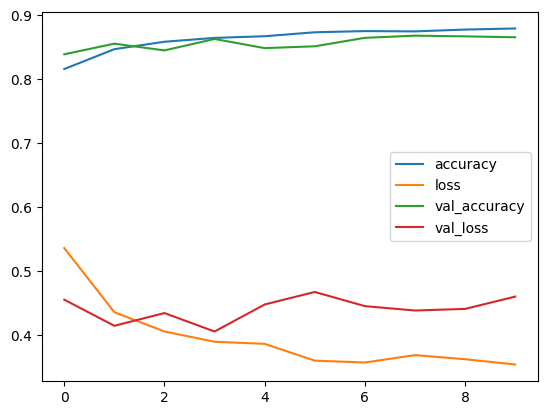

In [34]:
hist = pd.DataFrame(history.history)
hist.plot()

In [35]:
from sklearn.metrics import classification_report

In [37]:
y_pred = model.predict(x_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
y_pred = (y_pred>0.5).astype(int)

In [43]:
y_test = y_test.astype(np.int32)

In [48]:
loss, accuracy = model.evaluate(y_test,y_pred)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_3_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 784), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=False
  • mask=None

In [1]:
ls = [1,2,3,4,5,6,7,11,12,3]

In [3]:
ls[-3:-1]

[11, 12]